In [98]:
# Import packages
import numpy as np
curDay = 13

# # Download input file
# from download_inputs import download_inputs

# download_inputs(curDay)

In [99]:
# Load input into workspace
filename = f'inputs\\day{curDay}.txt'
# filename = f'inputs\\day{curDay}test.txt'
# curIn = np.loadtxt(filename)

# filename= 'inputs\\asdf.txt'

# Start by loading the data
inputFile = open(filename)
inputs = []
inputs = [s for s in inputFile.read().splitlines()]

print('Done loading input')

Done loading input


In [100]:
# inputs

In [101]:
curGrid = []
allFolds = []   
addToGrid = True
for k in range(len(inputs)):
    if len(inputs[k])== 0:
        addToGrid = False
    if addToGrid:
        curGrid.append(inputs[k])
    else:
        allFolds.append(inputs[k])
allFolds = allFolds[1:]

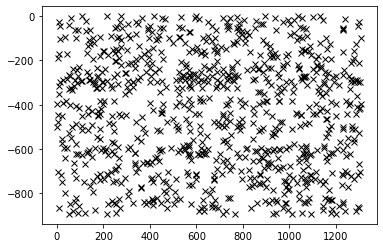

In [102]:
curGrid
allFolds
# for y in range(len(curGrid)):
#     thisLine = ''
#     for x in range(len(curGrid[y])):
        
grid = [[int(x) for x in x.split(',')] for x in curGrid]

import matplotlib.pyplot as plt

for k in range(len(grid)):
    thisdots = grid[k]
    plt.plot(thisdots[0],-thisdots[1],'xk')


763

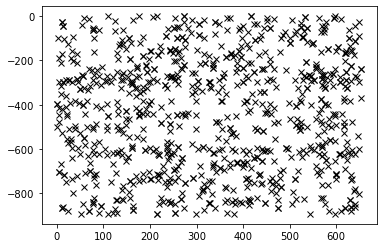

In [103]:
firstFold = allFolds[0].split(' ')[-1]
firstFold.split('=')
curDir = firstFold.split('=')[0]
curAm =  int(firstFold.split('=')[1])

if curDir == 'y':
    foldGrid = []
    for k in range(len(grid)):
        thisdots = grid[k]
        thisY = thisdots[1]
        
        distToFold = (thisY - curAm)

        toAppend = thisdots.copy()
        if (distToFold > 0):
            toAppend[1] = curAm-distToFold
        foldGrid.append(toAppend)
        
if curDir == 'x':
    foldGrid = []
    for k in range(len(grid)):
        thisdots = grid[k]
        thisX = thisdots[0]
        
        distToFold = (thisX - curAm)

        toAppend = thisdots.copy()
        if (distToFold > 0):
            toAppend[0] = curAm-distToFold
        foldGrid.append(toAppend)
    

for k in range(len(foldGrid)):
    thisdots = foldGrid[k]
    plt.plot(thisdots[0],-thisdots[1],'xk')

simGrid = [str(x[0])+','+str(x[1]) for x in foldGrid]
len(np.unique(np.array(simGrid)))
# for k in range(len(foldGrid)):
# np.array(foldGrid)
# np.unique(np.array(foldGrid))

In [104]:
def performFold(curGrid,foldNum):
    thisFold = allFolds[foldNum].split(' ')[-1]
    thisFold.split('=')
    curDir = thisFold.split('=')[0]
    curAm =  int(thisFold.split('=')[1])
    if curDir == 'y':
        foldGrid = []
        for k in range(len(curGrid)):
            thisdots = curGrid[k]
            thisY = thisdots[1]
            
            distToFold = (thisY - curAm)

            toAppend = thisdots.copy()
            if (distToFold > 0):
                toAppend[1] = curAm-distToFold
            foldGrid.append(toAppend)
            
    if curDir == 'x':
        foldGrid = []
        for k in range(len(curGrid)):
            thisdots = curGrid[k]
            thisX = thisdots[0]
            
            distToFold = (thisX - curAm)

            toAppend = thisdots.copy()
            if (distToFold > 0):
                toAppend[0] = curAm-distToFold
            foldGrid.append(toAppend)

    return(foldGrid)
        
foldGrid = performFold(grid,0)

simGrid = [str(x[0])+','+str(x[1]) for x in foldGrid]
len(np.unique(np.array(simGrid)))

763

In [105]:
len(allFolds)
newgrid = grid.copy()
for m in range(len(allFolds)):
    newgrid = performFold(newgrid.copy(),m)
    # simGrid = [str(x[0])+','+str(x[1]) for x in newgrid]
    # print(len(np.unique(np.array(simGrid))))

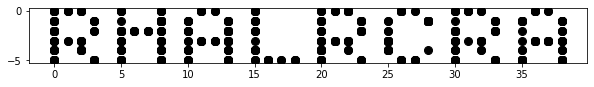

In [106]:

plt.figure(figsize=(10,1))
for k in range(len(newgrid)):
    thisdots = newgrid[k]
    plt.plot(thisdots[0],-thisdots[1],'ok',markersize=8)